<a href="https://colab.research.google.com/github/rohailkhan/Acomputer_vision/blob/main/21__Cats_and_dogs_Transfer_learning_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
# libraries for pr-processing and plotting
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
#keras libraries for processing images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory


# for plotting model  and transfer learning
from keras import utils
from keras.layers import Input
#Libraries for CNN
from keras.models import Sequential , Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, Dropout
# Optimizers
from tensorflow.keras.optimizers import SGD , Adam


## Steps
1- Create folders of Train and Test data

2- Each Train/Test folder has Cat and Dog folders


1.   Create folders of Train and Test data
2.   Each Train/Test folder has Cat and Dog folders
2.   Create Data Generator object for re scaling 
2.   Create Training/Testing Generators with epoch=64 and target size=(200,200) 
2.   Create VGG style model of 3 stages with singgle Conv2d of 32,64 and 128 followed by Maxpooling of 2,2 and one dropout layer

2.   Fit the Train flow and test flow in the model.fit with **steps per epochs =Training_generator.n//Training_generator.batch_size**

2.   Each Train/Test folder has Cat and Dog folders
2.   Create Data Generator object for re scaling 


 

## To folder

In [2]:
# base_folder='/content/drive/MyDrive/Cat_dog_25002' # for flow to dataframe

base_folder='/content/drive/MyDrive/Cats_dog_10k to folder' # for flow to directory
train_folder='/content/drive/MyDrive/Cats_dog_10k to folder/train'
test_folder='/content/drive/MyDrive/Cats_dog_10k to folder/test'

In [6]:
c='/content/drive/MyDrive/Cats_dog_10k to folder/train/cats/'
os.listdir(c)[0:3]

['cat.1408.jpg', 'cat.150.jpg', 'cat.12479.jpg']

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
a=[ (c + a) for a in os.listdir(c)[0:4]]

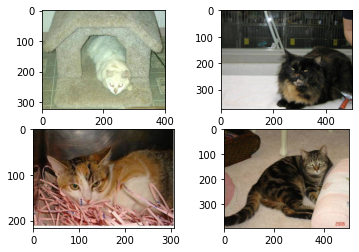

In [8]:
# plt.subplots is easy choice

k=0
for i in a:
  k=k+1
  plt.subplot(2,2,k)
  plt.imshow(imread(i))

In [10]:
data_gen=ImageDataGenerator(rescale=1.0/255.0)

data_gen_training=data_gen.flow_from_directory(directory=train_folder,target_size=(200,200) ,class_mode='binary'
,batch_size=64)

data_gen_testing=data_gen.flow_from_directory(directory=test_folder,target_size=(200,200) , class_mode='binary'
,batch_size=64)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
def base_model():
    model=Sequential()
    # Stage 1
    model.add(Conv2D(filters=32 , kernel_size=(3,3),input_shape=(200,200,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    model.add(Dropout(0.2))
    
     # Stage 2
    model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    model.add(Dropout(0.2))
    
     # Stage 3
    model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(units=50,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    return model
model=base_model()

In [ ]:
#model.fit(data_gen_training , steps_per_epoch=(data_gen_training.n/data_gen_training.batch_size), batch_size=100,verbose=1,validation_data=data_gen_testing
# ,validation_steps= (data_gen_testing.n/data_gen_testing.batch_size)       ,epochs=10)

### Important note:
steps_per_epoch=(data_gen_training.n/data_gen_training.batch_size) are very small steps. Its better to keep steps equal to length of test data

In [ ]:
model.fit(data_gen_training , steps_per_epoch=len(data_gen_testing), batch_size=100,verbose=1,validation_data=data_gen_testing
  ,epochs=10)

Epoch 1/10
32/32 [==============================] - 659s 21s/step - loss: 0.7594 - accuracy: 0.5039 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 254s 8s/step - loss: 0.6886 - accuracy: 0.5078 - val_loss: 0.6903 - val_accuracy: 0.5650
Epoch 3/10
32/32 [==============================] - 208s 6s/step - loss: 0.6835 - accuracy: 0.5391 - val_loss: 0.6623 - val_accuracy: 0.6185
Epoch 4/10
32/32 [==============================] - 194s 6s/step - loss: 0.6513 - accuracy: 0.6128 - val_loss: 0.6252 - val_accuracy: 0.6165
Epoch 5/10
32/32 [==============================] - 184s 6s/step - loss: 0.6452 - accuracy: 0.6362 - val_loss: 0.6258 - val_accuracy: 0.6400
Epoch 6/10
32/32 [==============================] - 181s 6s/step - loss: 0.6057 - accuracy: 0.6631 - val_loss: 0.5970 - val_accuracy: 0.6705
Epoch 7/10
32/32 [==============================] - 184s 6s/step - loss: 0.5988 - accuracy: 0.6855 - val_loss: 0.6074 - val_accuracy: 0.6780
Epoch 8/10
3

In [ ]:
loss,acc=model.evaluate(data_gen_testing,steps=len(data_gen_testing) , verbose=1)

32/32 [==============================] - 39s 1s/step - loss: 0.5553 - accuracy: 0.7120


In [ ]:
print('loss={} and accuracy={}'.format(loss*100,acc*100))

loss=55.52735924720764 and accuracy=71.20000123977661


# Predict

In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [13]:
def predict_image(photo,model):
  picture=load_img(photo , target_size=(200,200))
  picture=img_to_array(picture)
  picture=picture.reshape(1,200,200,3)
  picture=(picture/255.0).astype('float32')
  predictions=model.predict(picture)
  if predictions < 0.51:
    print('Dog')
  else:
    print('Cat')

In [ ]:
p1='/content/drive/MyDrive/20210309_Datasets/cat.2.jpg'
p2='/content/drive/MyDrive/20210309_Datasets/cat.14.jpg'
p3='/content/drive/MyDrive/20210309_Datasets/dog.jpg'
p4='/content/drive/MyDrive/20210309_Datasets/dog.68.jpg'

In [ ]:
predict_image(p4,model)

In [ ]:
img=img_to_array(img)

## Data Augmentation
### augmentation is done only to the training data

In [ ]:
# base_folder='/content/drive/MyDrive/Cat_dog_25002' # for flow to dataframe

base_folder='/content/drive/MyDrive/Cats_dog_10k to folder' # for flow to directory
train_folder='/content/drive/MyDrive/Cats_dog_10k to folder/train'
test_folder='/content/drive/MyDrive/Cats_dog_10k to folder/test'

In [ ]:
data_gen_augmentation_object=ImageDataGenerator(rescale=1.0/255.0,
width_shift_range=0, height_shift_range=0, horizontal_flip=False)


In [ ]:
# augmentation is done only to the training data
data_gen_training__augmentation_flow=data_gen_augmentation_object.flow_from_directory(directory=train_folder,batch_size=64,
                                                   target_size=(200,200),class_mode='binary')

Found 8000 images belonging to 2 classes.


In [ ]:
data_gen_testing_object=ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
data_gen_testing_flow=data_gen_testing_object.flow_from_directory(directory=test_folder,target_size=(200,200) , class_mode='binary'
,batch_size=64)

Found 2000 images belonging to 2 classes.


In [ ]:
def base_model():
    model=Sequential()
    # Stage 1
    model.add(Conv2D(filters=32 , kernel_size=(3,3),input_shape=(200,200,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    # model.add(Dropout(0.2))
    
    #  # Stage 2
    # model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    # model.add(Dropout(0.2))
    
    #  # Stage 3
    # model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    # model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(units=50,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    return model
model=base_model()

In [ ]:
history=model.fit(data_gen_training__augmentation_flow , steps_per_epoch=len(data_gen_testing_flow), batch_size=100,verbose=1,validation_data=data_gen_testing_flow,epochs=10)

Epoch 1/10
32/32 [==============================] - 1034s 33s/step - loss: 4.2550 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 356s 11s/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 262s 8s/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 214s 7s/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
24/32 [=====================>........] - ETA: 35s - loss: 0.6931 - accuracy: 0.5091

# Using VGG model

# Using only VGG's classifier part & holding weights of all CNN layers


1.   Remove the classifier part (which is the part which is just BEFORE the flatten layer .
2.   Hold the weights so only our own fully connected layer is trained (using the advantage of the pre-trained weights from VGG-16)
1.   Just add our own Flatten layer and 2 last Dense layers
## How to implement
1.   Just use include_top=False to remove the last classifier part
2.   We should keep the input shape JUST like the input shape of the VGG16 i.e 224,224,3 
2.   We can hold the weights by using a for loop 



In [14]:
from keras.models import Sequential , Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, Dropout
from keras.applications.vgg16 import VGG16

In [15]:
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [16]:
model=VGG16(include_top=False,input_shape=(224,224,3))

58900480/58889256 [==============================] - 1s 0us/step


In [18]:
for layer in model.layers:
  layer.trainable=False

In [25]:
# flatten layer should be the end of the "output" if the 
# last layers. Last layer is [-1] and output of last layer= model.layers[-1].output. so we have 
flat1=Flatten()(model.layers[-1].output)
dense_2nd_last=Dense(128,activation='relu' , kernel_initializer='he_uniform')(flat1)
output=Dense(1,activation='sigmoid')(dense_2nd_last)
#define new model...notice we are using the same inputs..but only cutting the last part and using our own
model1=Model(inputs= model.inputs , outputs=output)

In [26]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# augmentation is done only to the training data...make su
#data_gen_augmentation_object=ImageDataGenerator(rescale=1.0/255.0,
#width_shift_range=0, height_shift_range=0, horizontal_flip=False)
data_gen=ImageDataGenerator(featurewise_center=True)
# specify imagenet mean values for centering
data_gen.mean = [123.68, 116.779, 103.939]

train_it=data_gen.flow_from_directory(directory=train_folder,batch_size=64,
                                                   target_size=(224,224),class_mode='binary')
test_it=data_gen.flow_from_directory(directory=test_folder,target_size=(224,224) , class_mode='binary'
,batch_size=64)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [28]:
the_steps=len(test_it)
history=model1.fit(train_it ,steps_per_epoch=the_steps,validation_data=test_it, validation_steps=the_steps, epochs=10,verbose=1)

Epoch 1/10
32/32 [==============================] - 726s 22s/step - loss: 12.1577 - accuracy: 0.5127 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 271s 9s/step - loss: 0.6932 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 209s 7s/step - loss: 0.6931 - accuracy: 0.5054 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 168s 5s/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 127s 4s/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 100s 3s/step - loss: 0.6931 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 77s 2s/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
3

In [36]:
loss , acc =model1.evaluate(test_it,verbose=1,steps=the_steps)

32/32 [==============================] - 15s 450ms/step - loss: 0.6932 - accuracy: 0.5000


In [38]:
# save history and model
# saving model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/catdog.h5'
# saving model
model1.save(model_path,overwrite=True)


# saving model history 
import json

# # Save it under the form of a json file
history_path=path +'/catdog_history1.json'

json.dump(str(history1), open(history_path, 'w'))

In [29]:
history1=history.history

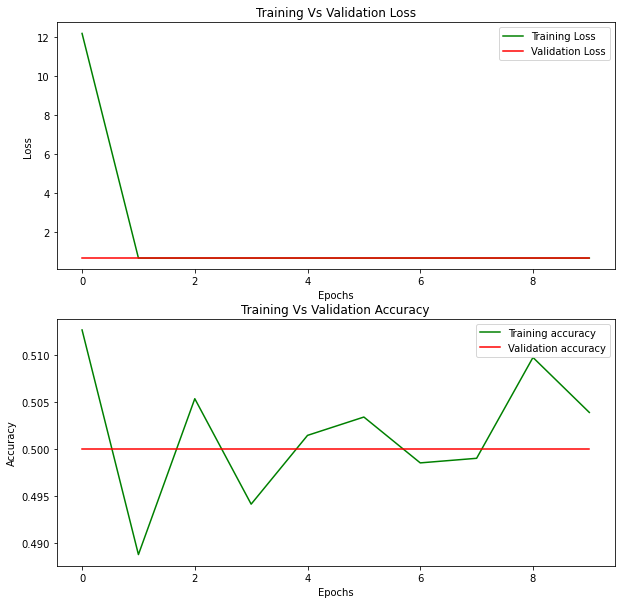

In [39]:
def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,10),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,10),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,10),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,10),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()
plot_diagnostics(history1)

In [30]:
history1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

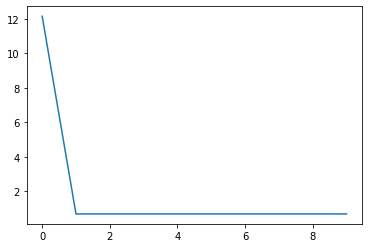

In [32]:
plt.plot(history1['loss'])

In [ ]:
k=0
for i in a:
  k=k+1
  plt.subplot(2,2,k)
  plt.imshow(imread(i))

In [ ]:
# define cnn model
def define_model():
  # load model
  model = VGG16(include_top=False, input_shape=(224, 224, 3))
  # mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
  # add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(class1)
  # define new model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = train_datagen.flow_from_directory(train_folder,
class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = test_datagen.flow_from_directory(test_folder,
class_mode='binary', batch_size=64, target_size=(224, 224))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
def run_test_harness():
# define model
  model = define_model()
  # create data generator
  datagen = ImageDataGenerator(featurewise_center=True)
  # specify imagenet mean values for centering
  datagen.mean = [123.68, 116.779, 103.939]
  # prepare iterator
  train_it = datagen.flow_from_directory(train_folder,
  class_mode='binary', batch_size=64, target_size=(224, 224))
  test_it = datagen.flow_from_directory(test_folder,
  class_mode='binary', batch_size=64, target_size=(224, 224))
  # fit model
  history = model.fit(train_it, steps_per_epoch=len(train_it),
  validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
  # evaluate model
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
  print('> %.3f' % (acc * 100.0))
  return history

In [ ]:
history=run_test_harness()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
125/125 [==============================] - 2001s 16s/step - loss: 0.5559 - accuracy: 0.9474 - val_loss: 0.0764 - val_accuracy: 0.9660
Epoch 2/10
125/125 [==============================] - 73s 585ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0739 - val_accuracy: 0.9735
Epoch 3/10
125/125 [==============================] - 73s 579ms/step - loss: 0.0099 - accuracy: 0.9979 - val_loss: 0.0793 - val_accuracy: 0.9720
Epoch 4/10
125/125 [==============================] - 73s 579ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.0881 - val_accuracy: 0.9715
Epoch 5/10
125/125 [==============================] - 73s 579ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0933 - val_accuracy: 0.9735
Epoch 6/10
125/125 [==============================] - 73s 579ms/step - loss: 8.4910e-04 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9735
Epoch 7/10
125/125 [======================

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 97.350


In [ ]:
def summarize_diagnostics(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['acc'], color='blue', label='train')
  plt.plot(history.history['val_acc'], color='orange', label='test')
# save plot to file

## Data Generator object flow to dataframe (not prefered method)

In [ ]:
base_folder='/content/drive/MyDrive/Cat_dog_25002' # for flow to dataframe
def train_test_split(base_folder,training_size=0.75):
    trainh=pd.DataFrame(os.listdir(base_folder)[0:500],columns=['files'])
    traint=pd.DataFrame(os.listdir(base_folder)[-500:],columns=['files'])

    trainSmall1=pd.concat([trainh,traint])
    trainSmall1['cg']=['cat' if i.startswith('cat') else 'dog' for i in trainSmall1['files']]
    

    training, testing = np.split(trainSmall1.sample(frac=1, random_state=42),[int(training_size*len(trainSmall1))])
    return training , testing

trainn,testt =train_test_split(base_folder,training_size=0.75)
    

In [ ]:
os.listdir(base_folder)[0:3]

['dog.9098.jpg', 'dog.9094.jpg', 'dog.9105.jpg']

In [ ]:
data_gen_object=ImageDataGenerator( rescale=1.0/255.0,validation_split=0.25)

data_gen_object_training_flow=data_gen_object.flow_from_dataframe(trainn,diretory=base_folder,subset='training',x_col='files', y_col='cg',
target_size=(200,200), batch_size=64,class_mode='binary',validate_filenames=True)

data_gen_object_testing_flow=data_gen_object.flow_from_dataframe(trainn,diretory=base_folder,subset='validation',x_col='files', 
y_col='cg',target_size=(200,200), batch_size=64,class_mode='binary',validate_filenames=True)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 750 invalid image filename(s) in x_col="files". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 750 invalid image filename(s) in x_col="files". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
from tensorflow.keras.utils import load_img
from PIL import Image
import PIL

In [ ]:
model.fit(data_gen_object_training_flow ,batch_size=64,verbose=1,
validation_data=data_gen_object_testing_flow,epochs=3)

FileNotFoundError: ignored

Found 250 non-validated image filenames belonging to 2 classes.


## Define functions :
1 - load_dataset cifar10 :  just load data, in train and test features/labels and convert labels to cat


2 - prep_pixels : normalize the feautres between 0 and 1 and change to float

3 - define_model

4 - plot_diagnostics i.e loss vs val_loss and accuracy vs validation_accuracy

5 - run_model_harness which fits model (with history) ad evlauate model (to get accuracy) and plot_diagnostics


In [ ]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data() 
    trainY =tf.keras.utils.to_categorical(trainY)
    testY =tf.keras.utils.to_categorical(testY)
    return (trainX, trainY), (testX, testY)

# for feature pr-processing .     
def prep_pixels(trainX, testX):
    trainX1=trainX.astype('float32')/255.0 
    testX1=testX.astype('float32')/255.0 
    return (trainX1, testX1)

def base_model():
    model=Sequential()
    model.add(Conv2D(filters=32 , kernel_size=(3,3),input_shape=(200,200,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
    
    model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))

    model.add(Flatten())
    model.add(Dense(units=50,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    return model
model=base_model()


def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,10),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,10),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,10),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,10),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()


def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    history=model.fit(x=trainX,y=trainY,batch_size=64,epochs=10 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)
    return history1 , model


Epoch 1/10
625/625 [==============================] - 9s 13ms/step - loss: 1.4449 - accuracy: 0.4851 - val_loss: 1.2046 - val_accuracy: 0.5819
Epoch 2/10
625/625 [==============================] - 8s 12ms/step - loss: 1.0715 - accuracy: 0.6268 - val_loss: 1.0173 - val_accuracy: 0.6434
Epoch 3/10
625/625 [==============================] - 8s 12ms/step - loss: 0.9219 - accuracy: 0.6792 - val_loss: 0.9422 - val_accuracy: 0.6726
Epoch 4/10
625/625 [==============================] - 8s 12ms/step - loss: 0.8193 - accuracy: 0.7164 - val_loss: 0.9071 - val_accuracy: 0.6893
Epoch 5/10
625/625 [==============================] - 8s 12ms/step - loss: 0.7257 - accuracy: 0.7487 - val_loss: 0.8767 - val_accuracy: 0.7062
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6412 - accuracy: 0.7774 - val_loss: 0.8734 - val_accuracy: 0.7053
Epoch 7/10
625/625 [==============================] - 8s 12ms/step - loss: 0.5665 - accuracy: 0.8040 - val_loss: 0.8964 - val_accuracy: 0.7127

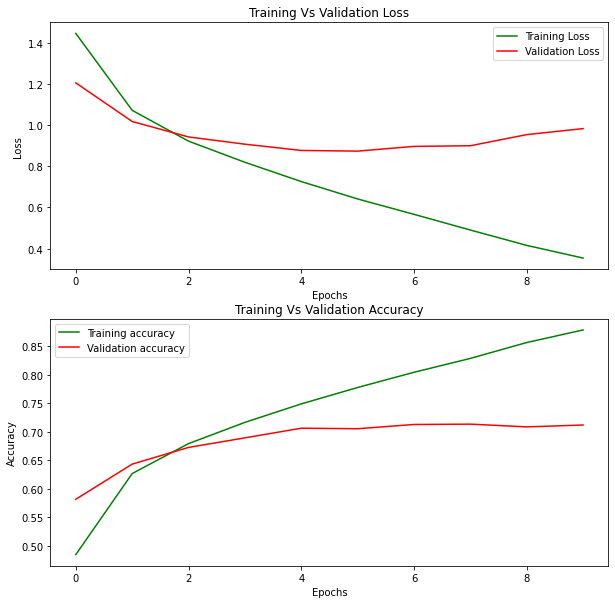

In [ ]:
run_model_harness()

# **Improving Model using VGG-Style**

Make a 3 block CNN similar to VGG-style which involves CNN layers followed by Pooling with padding='uniform' and kernel_initializer='he_uniform
1.   Increasing Conv2d of 32 , 64,128 with kernel-size=3x3 and 'relu' activation
2.   Each Conv2d followed by Max pooling of 2x2

1.   Finally Dense 128 and 10 (of course after Flatten layer)





In [ ]:
def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

Epoch 1/10
625/625 [==============================] - 10s 14ms/step - loss: 1.3560 - accuracy: 0.5190 - val_loss: 1.1128 - val_accuracy: 0.6116
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 0.9617 - accuracy: 0.6649 - val_loss: 0.9928 - val_accuracy: 0.6505
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.7851 - accuracy: 0.7268 - val_loss: 0.8824 - val_accuracy: 0.6936
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6480 - accuracy: 0.7749 - val_loss: 0.8683 - val_accuracy: 0.7077
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.5230 - accuracy: 0.8186 - val_loss: 0.9015 - val_accuracy: 0.7074
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 0.4135 - accuracy: 0.8536 - val_loss: 0.9717 - val_accuracy: 0.7146
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3254 - accuracy: 0.8861 - val_loss: 1.0809 - val_accuracy: 0.700

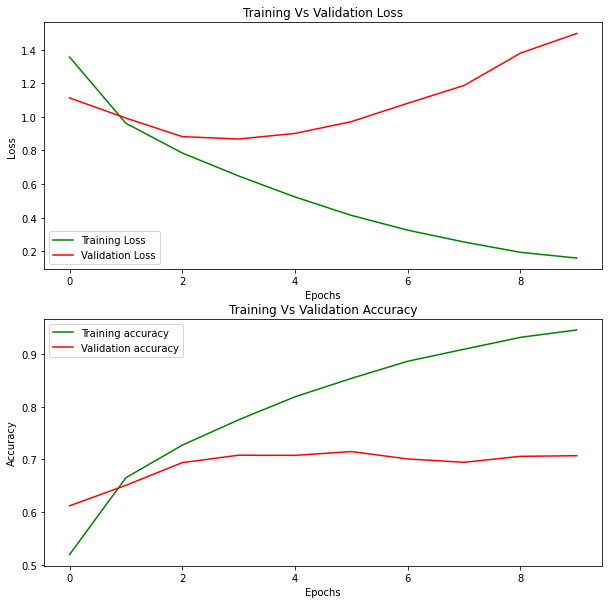

In [ ]:
run_model_harness()

# Improving the VGG style model



1.   Make double ConvD layers prior to each Maxpooling
2.   Add dropout=0.2 after each block



In [ ]:
def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.2))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dropout(0.2))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dropout(0.2))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(history['loss'],color='green',label='Training Loss')
    axx[0].plot(history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()

In [ ]:

def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    history=model.fit(x=trainX,y=trainY,batch_size=100,epochs=15 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)
    return history1 , model

Epoch 1/15
500/500 [==============================] - 15s 29ms/step - loss: 1.8306 - accuracy: 0.3982 - val_loss: 1.3322 - val_accuracy: 0.5293
Epoch 2/15
500/500 [==============================] - 14s 29ms/step - loss: 1.2404 - accuracy: 0.5635 - val_loss: 1.1453 - val_accuracy: 0.6042
Epoch 3/15
500/500 [==============================] - 14s 28ms/step - loss: 1.0598 - accuracy: 0.6265 - val_loss: 1.0801 - val_accuracy: 0.6417
Epoch 4/15
500/500 [==============================] - 14s 29ms/step - loss: 0.9535 - accuracy: 0.6684 - val_loss: 0.8848 - val_accuracy: 0.6954
Epoch 5/15
500/500 [==============================] - 14s 28ms/step - loss: 0.8764 - accuracy: 0.6975 - val_loss: 0.8752 - val_accuracy: 0.7032
Epoch 6/15
500/500 [==============================] - 14s 29ms/step - loss: 0.8121 - accuracy: 0.7196 - val_loss: 0.8997 - val_accuracy: 0.6930
Epoch 7/15
500/500 [==============================] - 14s 28ms/step - loss: 0.7762 - accuracy: 0.7290 - val_loss: 0.7940 - val_accuracy:

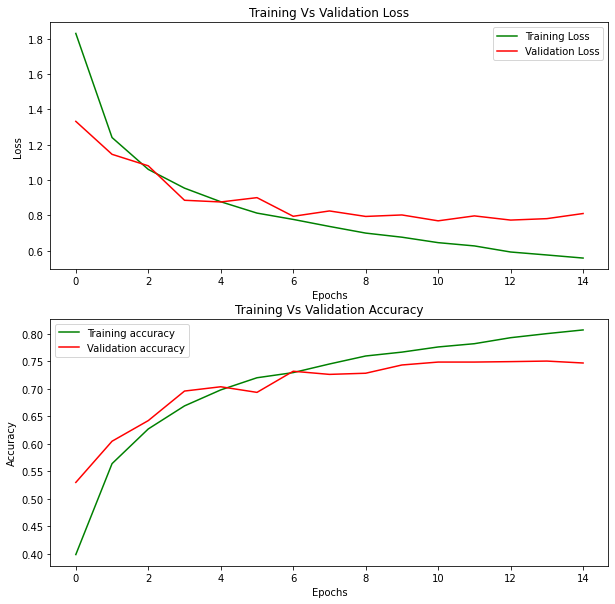

In [ ]:
#batch size=100
history1 , model=run_model_harness() 

## Saving Model
### 1- Saving Model and History

In [ ]:
# saving model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/CIFAR1.h5'
# saving model
model.save(model_path,overwrite=True)

In [ ]:
# saving model history 
import json

# # Save it under the form of a json file
history_path=path +'/CIFAR_history1.json'

json.dump(str(history1), open(history_path, 'w'))

## Plotting from the saved History

In [ ]:
path='/content/drive/MyDrive/20210309_Files/'
history_path=path +'/CIFAR_history1.json'
history1= json.load(open(history_path, 'r'))

TypeError: ignored

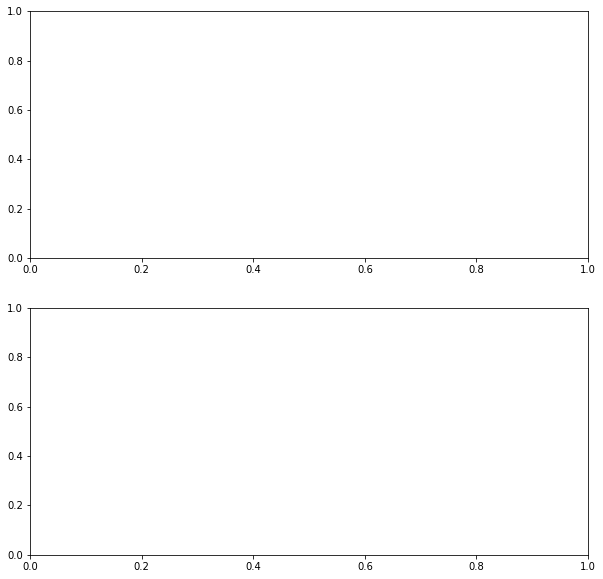

In [ ]:
fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
axx[0].plot(range(0,10),history1['loss'],color='green',label='Training Loss')
axx[0].plot(range(0,10),history1['val_loss'], color='red' ,label='Validation Loss')
axx[0].set_title('Training Vs Validation Loss')
axx[0].set_ylabel('Loss')
axx[0].set_xlabel('Epochs')
axx[0].legend()

axx[1].plot(range(0,10),history1['accuracy'],color='green',label='Training accuracy')
axx[1].plot(range(0,10),history1['val_accuracy'], color='red' ,label='Validation accuracy')
axx[1].set_title('Training Vs Validation Accuracy')
axx[1].set_ylabel('Accuracy')
axx[1].set_xlabel('Epochs')
axx[1].legend()

plt.show()

## **Why error in plotting loaded History in json format?**

In [ ]:
type(history1)

str

In [ ]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history2=ast.literal_eval(history1)

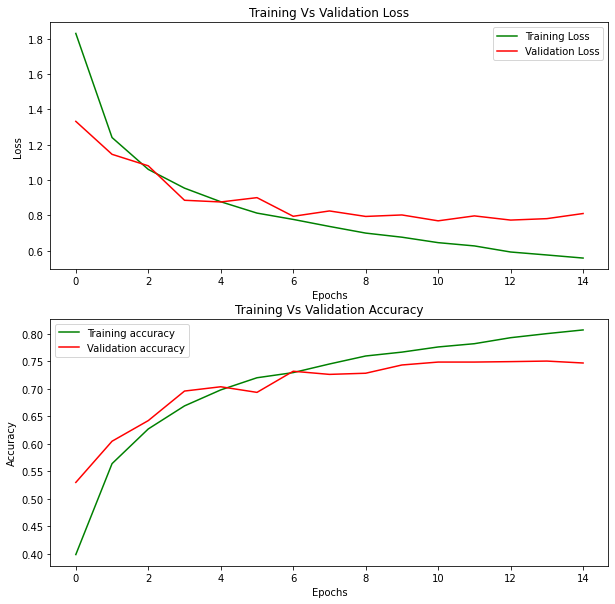

In [ ]:
fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
axx[0].plot(history2['loss'],color='green',label='Training Loss')
axx[0].plot(history2['val_loss'], color='red' ,label='Validation Loss')
axx[0].set_title('Training Vs Validation Loss')
axx[0].set_ylabel('Loss')
axx[0].set_xlabel('Epochs')
axx[0].legend()

axx[1].plot(history2['accuracy'],color='green',label='Training accuracy')
axx[1].plot(history2['val_accuracy'], color='red' ,label='Validation accuracy')
axx[1].set_title('Training Vs Validation Accuracy')
axx[1].set_ylabel('Accuracy')
axx[1].set_xlabel('Epochs')
axx[1].legend()

plt.show()

# Using Model Evalutation (only) on the Test Data
This time ,no training is required. Simply load the previously saved model (that was trainined using the training data)

In [ ]:
(trainX, trainY), (testX, testY)= load_dataset()
(trainX, testX)=prep_pixels(trainX, testX)

In [ ]:
losses , accuracy =model.evaluate(testX, testY)
print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))

313/313 [==============================] - 3s 8ms/step - loss: 0.8097 - accuracy: 0.7464
Final modal accuracy=74.6399998664856 loss=0.8096747994422913


# Predictions


```
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
```



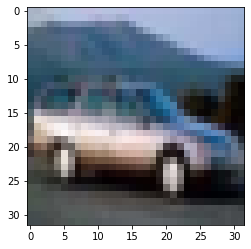

In [ ]:
plt.imshow(trainX[4])
plt.show()

In [ ]:
image_path='/content/drive/MyDrive/20210309_Datasets/white car.png'
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
model=load_model(filepath='/content/drive/MyDrive/20210309_Files/CIFAR1.h5')

In [ ]:
image=load_img(path=image_path,target_size=(32,32,3))


In [ ]:
image=np.array(image)
image.shape

(32, 32, 3)

In [ ]:
image=image.reshape(1,32,32,3)

In [ ]:
image=image.astype('float32')/255.0
prediction=model.predict(image)
prediction

array([[1.8439794e-01, 1.0419449e-02, 9.0912050e-03, 8.2892096e-03,
        8.0962509e-02, 2.2248518e-04, 1.6813735e-03, 1.2872267e-01,
        1.5864888e-02, 5.6034833e-01]], dtype=float32)

In [ ]:
prediction.argmax()

9

he class labels and their standard associated
integer values are listed below.
❼ 0: airplane
❼ 1: automobile
❼ 2: bird
❼ 3: cat
❼ 4: deer
❼ 5: dog
❼ 6: frog
❼ 7: horse
❼ 8: ship
❼ 9: truck

The above prediction is not right since our model still has less accuracy

# **CIFR Data Augmentation**

In [ ]:
from numpy import asarray
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils

In [ ]:
pd.read_csv

## Steps ImageDataGenerator Augmentation

1.   make ImageDataGenerator object
2.   flow this object through train X and Y in some batch_size
3.   Fit this generator flow object in model.fit with steps_size=samples/batch_size

 Note : (width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen_object=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True )

generator_flow_object=gen_object.flow(trainX,trainY,batch_size=64)

#model.fit(generator_flow_object, steps_per_epoch=int(trainX.shape[0]/64), validation_data=(testX,testY),verbose=1)


In [ ]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data() 
    trainY =tf.keras.utils.to_categorical(trainY)
    testY =tf.keras.utils.to_categorical(testY)
    return (trainX, trainY), (testX, testY)

# for feature pr-processing .     
def prep_pixels(trainX, testX):
    trainX1=trainX.astype('float32')/255.0 
    testX1=testX.astype('float32')/255.0 
    return (trainX1, testX1)

def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.2))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dropout(0.2))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dropout(0.2))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,30),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,30),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,30),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,30),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()


def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    image_data_object=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
    image_data_object_flow=image_data_object.flow(trainX,trainY, batch_size=64)
    history=model.fit(image_data_object_flow,steps_per_epoch=int(trainX.shape[0]/64) , batch_size=100,epochs=30 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)
    return history1 , model


Epoch 1/30
781/781 [==============================] - 36s 45ms/step - loss: 1.5201 - accuracy: 0.4505 - val_loss: 1.2004 - val_accuracy: 0.5709
Epoch 2/30
781/781 [==============================] - 35s 45ms/step - loss: 1.1809 - accuracy: 0.5833 - val_loss: 0.9925 - val_accuracy: 0.6576
Epoch 3/30
781/781 [==============================] - 35s 44ms/step - loss: 1.0644 - accuracy: 0.6255 - val_loss: 0.9603 - val_accuracy: 0.6633
Epoch 4/30
781/781 [==============================] - 35s 44ms/step - loss: 0.9911 - accuracy: 0.6539 - val_loss: 0.8813 - val_accuracy: 0.6925
Epoch 5/30
781/781 [==============================] - 35s 44ms/step - loss: 0.9279 - accuracy: 0.6755 - val_loss: 0.8651 - val_accuracy: 0.6981
Epoch 6/30
781/781 [==============================] - 34s 44ms/step - loss: 0.8869 - accuracy: 0.6921 - val_loss: 0.8078 - val_accuracy: 0.7251
Epoch 7/30
781/781 [==============================] - 35s 45ms/step - loss: 0.8468 - accuracy: 0.7050 - val_loss: 0.7878 - val_accuracy:

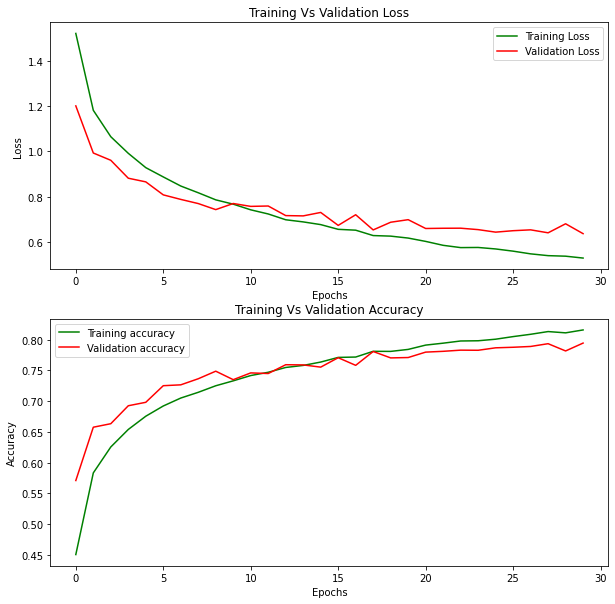

In [ ]:
history1 , model=run_model_harness()

## saving model and history

In [ ]:
# saving  history1 , model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/CIFAR1_augmented.h5'
# saving model
model.save(model_path,overwrite=True)

# saving model history 
import json

# # Save it under the form of a json file
history_path=path +'/CIFAR1_augmented_history1.json'

json.dump(str(history1), open(history_path, 'w'))


In [ ]:
## loading history

path='/content/drive/MyDrive/20210309_Files/'
history_path=path +'/CIFAR1_augmented_history1.json'
history1= json.load(open(history_path, 'r'))

# The loaded history is in String format.Converting it back to
# dictionary
import ast
history2=ast.literal_eval(history1)

from keras.models import load_model
model=load_model(filepath='/content/drive/MyDrive/20210309_Files/CIFAR1_augmented.h5')

# **CIFR batch normalization**

1. Already used 2 sets of Conv layers (32,64,128) followed by a Max-Pool & dropput layer

2. Just add Batch Normalization after each member of the Conv layer set

3. Also add Batch Normalizatoin after Dense layer

Note :
 
Batch normalization is more often done before the activation function. 
 
Since the goal here is to normalize the weights and bias of the next layer, some do it after the activation function as well (its also faster)


In [ ]:
from keras.layers import BatchNormalization

In [ ]:
def base_model():
  model=Sequential()
  # 1 Conv2d-Maxpool
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,input_shape=(32,32,3),padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=32,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # 2 Conv2d-Maxpool
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=64,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # 3 Conv2d-Maxpool
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Conv2D(filters=128,kernel_size=(3,3) ,padding='same', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # Final Desne layers
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,gamma_initializer='ones'))  ### adding Batch Normalization
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def plot_diagnostics(history):
    fig , axx = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
    axx[0].plot(range(0,100),history['loss'],color='green',label='Training Loss')
    axx[0].plot(range(0,100),history['val_loss'], color='red' ,label='Validation Loss')
    axx[0].set_title('Training Vs Validation Loss')
    axx[0].set_ylabel('Loss')
    axx[0].set_xlabel('Epochs')
    axx[0].legend()

    axx[1].plot(range(0,100),history['accuracy'],color='green',label='Training accuracy')
    axx[1].plot(range(0,100),history['val_accuracy'], color='red' ,label='Validation accuracy')
    axx[1].set_title('Training Vs Validation Accuracy')
    axx[1].set_ylabel('Accuracy')
    axx[1].set_xlabel('Epochs')
    axx[1].legend()

    plt.show()


def run_model_harness():
    (trainX, trainY), (testX, testY)= load_dataset()
    (trainX, testX)=prep_pixels(trainX, testX)
    model=base_model()
    image_data_object=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
    image_data_object_flow=image_data_object.flow(trainX,trainY, batch_size=64)
    history=model.fit(image_data_object_flow,steps_per_epoch=int(trainX.shape[0]/64) , batch_size=100,epochs=100 , validation_data=(testX, testY),verbose=1)
    
    losses , accuracy =model.evaluate(testX, testY)
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))
    
    history1=history.history
    plot_diagnostics(history1)
    return history1 , model


Epoch 1/100
781/781 [==============================] - 46s 57ms/step - loss: 1.4556 - accuracy: 0.4822 - val_loss: 1.2437 - val_accuracy: 0.5833
Epoch 2/100
781/781 [==============================] - 44s 56ms/step - loss: 1.1351 - accuracy: 0.6033 - val_loss: 1.0230 - val_accuracy: 0.6542
Epoch 3/100
781/781 [==============================] - 44s 56ms/step - loss: 1.0181 - accuracy: 0.6460 - val_loss: 0.9488 - val_accuracy: 0.6809
Epoch 4/100
781/781 [==============================] - 44s 56ms/step - loss: 0.9515 - accuracy: 0.6660 - val_loss: 0.8660 - val_accuracy: 0.7074
Epoch 5/100
781/781 [==============================] - 44s 57ms/step - loss: 0.8936 - accuracy: 0.6875 - val_loss: 0.8179 - val_accuracy: 0.7300
Epoch 6/100
781/781 [==============================] - 44s 56ms/step - loss: 0.8552 - accuracy: 0.7039 - val_loss: 0.7728 - val_accuracy: 0.7391
Epoch 7/100
781/781 [==============================] - 43s 56ms/step - loss: 0.8219 - accuracy: 0.7130 - val_loss: 0.7785 - val_ac

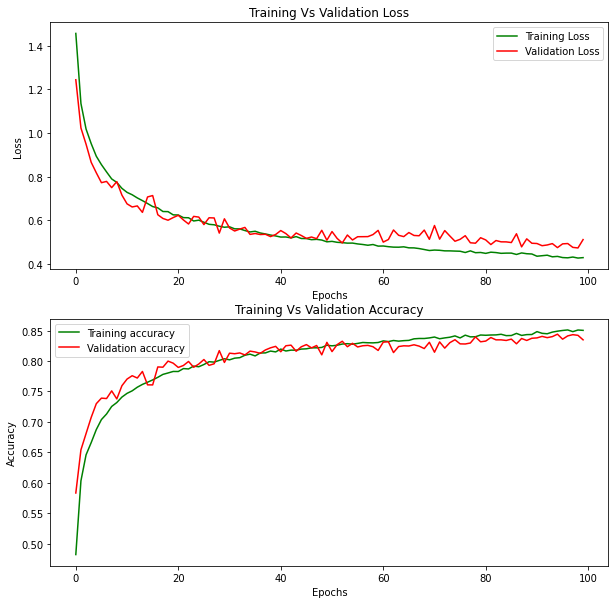

In [ ]:
history3 , model3 =run_model_harness()

In [ ]:
# saving  history1 , model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/CIFAR1_augm_norm100.h5'
# saving model
model3.save(model_path,overwrite=True)

# saving model history 
import json

# # Save it under the form of a json file
history_path=path +'/CIFAR1_augm_norm100_history1.json'

json.dump(str(history1), open(history_path, 'w'))


In [ ]:
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

image = load_img(image_path, target_size=(224,224))
# # convert the image pixels to a numpy array
image = np.array(image)
# # reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label1 = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label1[1], label1[2]*100))

digital_clock (39.83%)
